In [2]:
%%time
# for development, changes in other modules have to be reloaded to reflect changes
%load_ext autoreload
%autoreload 1

import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sbn 
import os, sys
import SimpleITK as sitk

%aimport config 
sys.path.append(config.lib_dir)
%aimport utils
%aimport segment 
%aimport match 
%aimport register 
%aimport evaluate 
%aimport qc 
sys.path.append(config.script_dir)
from slide_registration import *

CPU times: user 734 ms, sys: 1.02 s, total: 1.75 s
Wall time: 2.42 s


# Overview

The goal of this notebook is to compare the efficacy of the full slide's registrations for a given experiment.


In [3]:
# These must be adjusted to your specific experiment
dedusted_path = './dedusted_imgs/'   
unreg_path    = '/mnt/z/Marilyne/Axioscan/6-Dhivya/split/No_Scene/'
slide_name    = 'D1'
scene_name    = 'None'

In [6]:
img_file_names = [x for x in os.listdir(dedusted_path) if x[-4:] == '.tif']
parsed_names = pd.DataFrame([parse_file_name(x) for x in img_file_names])

# filter to slide/scene

# grab only the dapi channel 
parsed_names = parsed_names[lambda x: x.color_channel == 'c1']

parsed_names.head()

,round,protein,slide_name,date,scan_id,scene,color_channel,note,file_type,original
5,R7,Vimentin.BRCA1.CD8.CD44,D1,2020-10-12,9313,None,c1,ORG,tif,R7_Vimentin.BRCA1.CD8.CD44_D1_2020_10_12__9313...
8,R0,AF488.AF555.AF647.AF750,D1,2020-09-30,9123,None,c1,ORG,tif,R0_AF488.AF555.AF647.AF750_D1_2020_09_30__9123...
15,R9,CKs.Fibronectin.pERK.CD20,D1,2020-10-14,9353,None,c1,ORG,tif,R9_CKs.Fibronectin.pERK.CD20_D1_2020_10_14__93...
28,R5,BCLxL.CD68.PD1.pATM,D1,2020-10-08,9273,None,c1,ORG,tif,R5_BCLxL.CD68.PD1.pATM_D1_2020_10_08__9273_c1_...
29,R1,H3K27ME3.AXL.CCND1.HER2,D1,2020-10-02,9177,None,c1,ORG,tif,R1_H3K27ME3.AXL.CCND1.HER2_D1_2020_10_02__9177...


In [8]:
imgs_dedust= utils.load_imgs_mt(parsed_names.original.values, dedusted_path)

starting multithreaded image loading...
assigning threads...done.
waiting for threads to complete.
finished task: 6/10
threads complete.

...image loading complete.


In [9]:
imgs_unreg = utils.load_imgs_mt(parsed_names.original.values, unreg_path)

starting multithreaded image loading...
assigning threads...done.
waiting for threads to complete.
finished task: 7/10
threads complete.

...image loading complete.


# Testing de-dusting alg

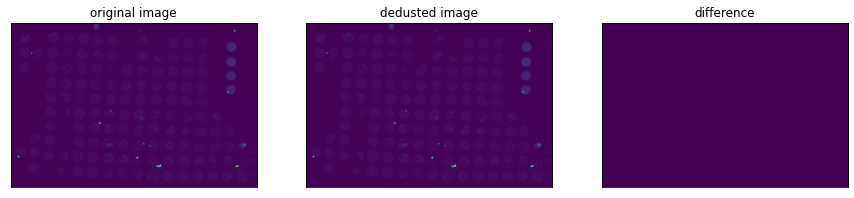

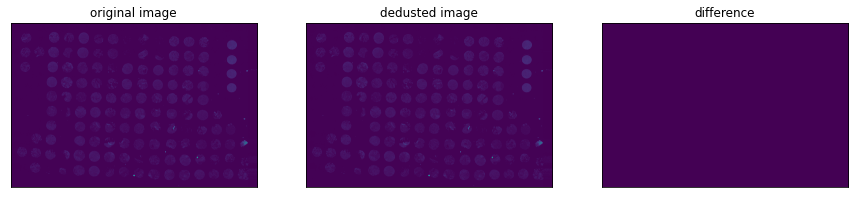

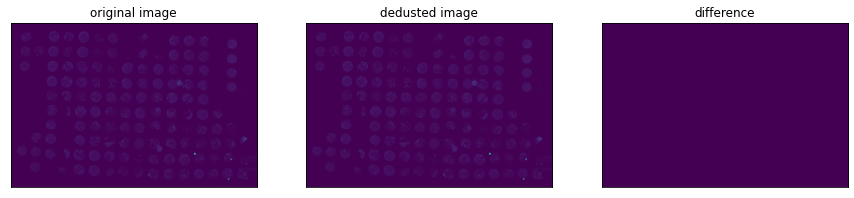

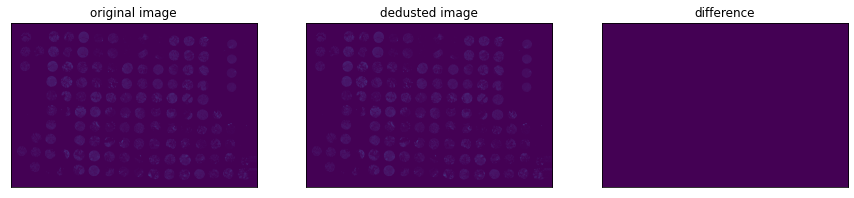

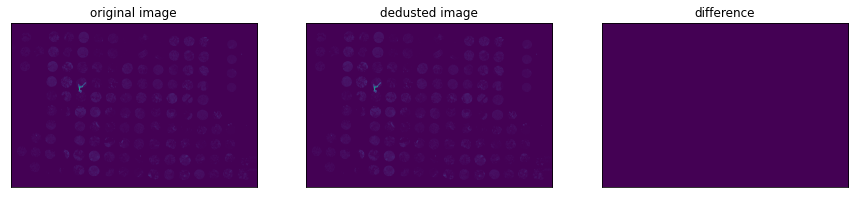

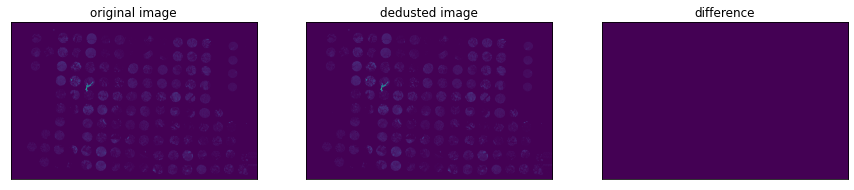

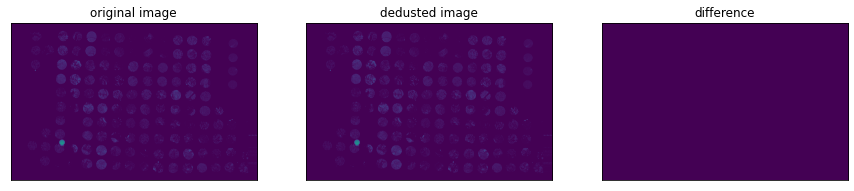

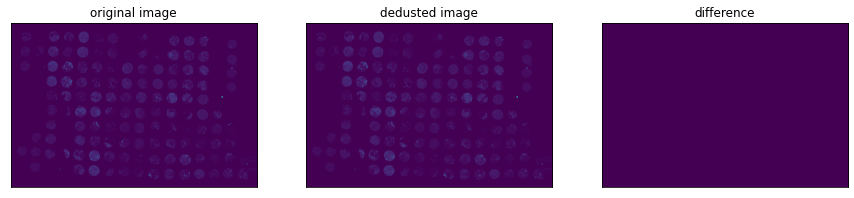

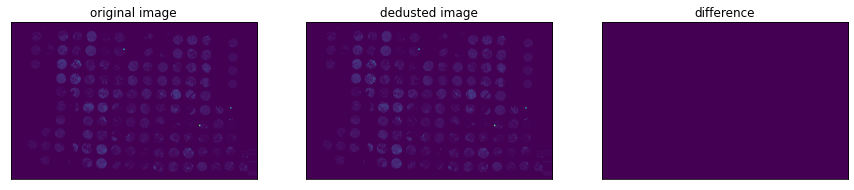

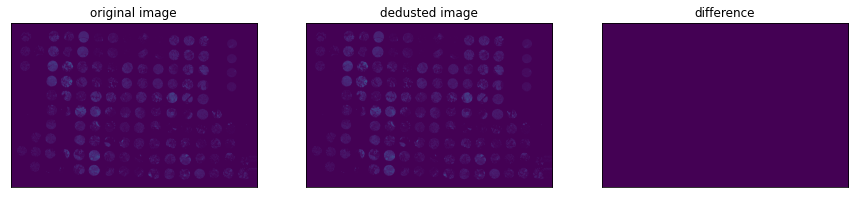

In [14]:
img_names = list(imgs_unreg.keys())
img_names.sort()
for _im in img_names: 
    f, axes = plt.subplots(1,3, figsize=(15,5))
    
    original = imgs_unreg[_im][::10, ::10]
    dedusted = imgs_dedust[_im][::10, ::10]
    
    utils.myshow(original, ax=axes.flat[0], title='original image')
    utils.myshow(dedusted, ax=axes.flat[1], title='dedusted image')
    difference = sitk.Cast(original, sitk.sitkFloat32) - sitk.Cast(dedusted, sitk.sitkFloat32)
    utils.myshow(difference, ax=axes.flat[2], title='difference')

    plt.show()